# 📊 EDA 분석 리포트
이 노트북은 재무 데이터셋에 대한 철저한 EDA 분석을 수행합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('../data/processed/features_v2_y_v1.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21833 entries, 0 to 21832
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21833 non-null  int64  
 1   corp_nm       21833 non-null  object 
 2   stock_code    21833 non-null  int64  
 3   year          21833 non-null  int64  
 4   부채비율          20023 non-null  float64
 5   유동비율          20023 non-null  float64
 6   자기자본비율        20023 non-null  float64
 7   고정자산비율        20023 non-null  float64
 8   고정비율          20023 non-null  float64
 9   순운전자본비율       20023 non-null  float64
 10  현금비율          19219 non-null  float64
 11  현금흐름부채비율      20023 non-null  float64
 12  완전자본잠식여부      21833 non-null  int64  
 13  자본잠식여부        21833 non-null  int64  
 14  총자산증가율        19219 non-null  float64
 15  유동자산증가율       19219 non-null  float64
 16  매출액증가율        19187 non-null  float64
 17  순이익증가율        19219 non-null  float64
 18  영업이익증가율       19219 non-nu

In [3]:
df.isnull().mean().sort_values(ascending=False)

재고자산회전율         0.143727
매출액증가율          0.121193
영업이익증가율         0.119727
현금비율            0.119727
순이익증가율          0.119727
총자산증가율          0.119727
유동자산증가율         0.119727
매출총이익률          0.086246
매출원가율           0.086246
매출채권회전율         0.086108
판관비율            0.082948
재무활동의존도         0.082948
비유동자산회전율        0.082948
유동비율            0.082902
부채비율            0.082902
총자산회전율          0.082902
순운전자본비율         0.082902
이익잉여금비율         0.082902
총자산영업이익율        0.082902
ROA             0.082902
ROE             0.082902
고정자산비율          0.082902
자산대비영업현금흐름      0.082902
현금자산비율          0.082902
고정비율            0.082902
현금보유율           0.082902
자기자본비율          0.082902
현금흐름부채비율        0.082902
ln매출액           0.082856
ln자산총계          0.082856
Unnamed: 0      0.000000
corp_nm         0.000000
자본잠식여부          0.000000
완전자본잠식여부        0.000000
year            0.000000
stock_code      0.000000
is_defaulted    0.000000
dtype: float64

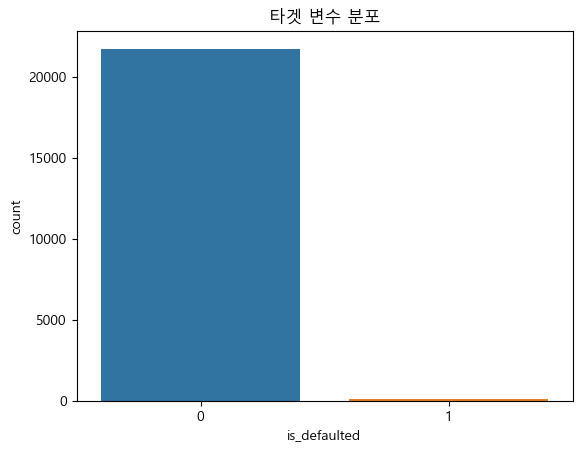

In [4]:
sns.countplot(data=df, x='is_defaulted')
plt.title('타겟 변수 분포')
plt.show()

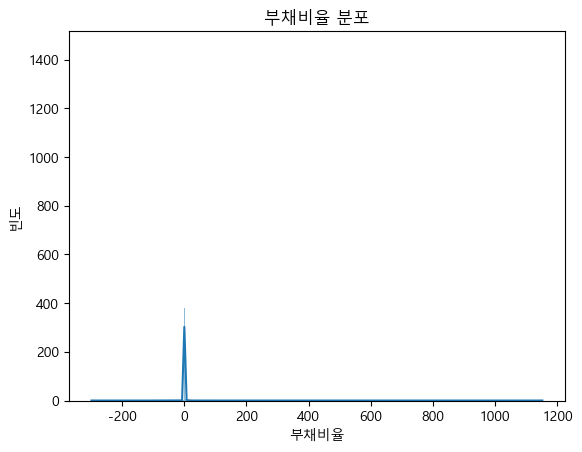

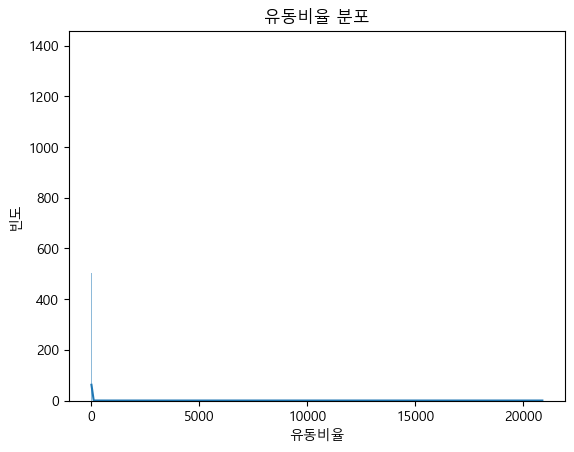

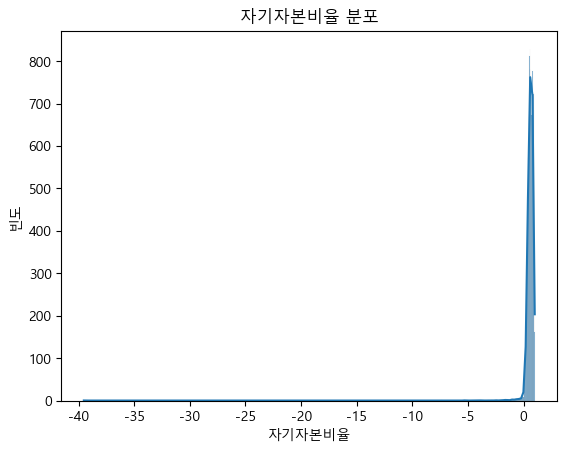

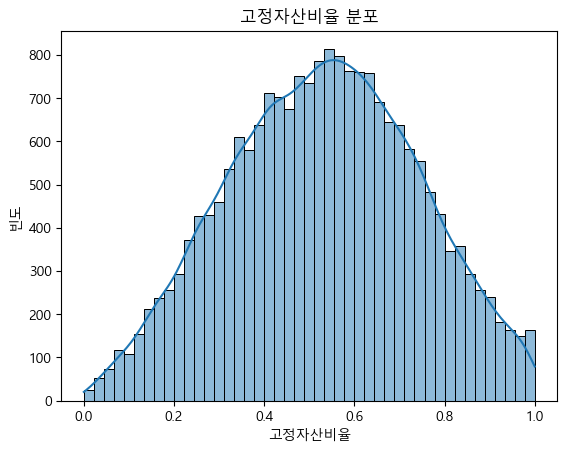

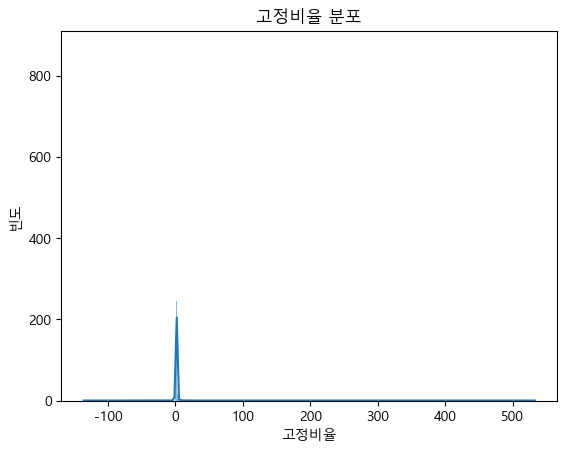

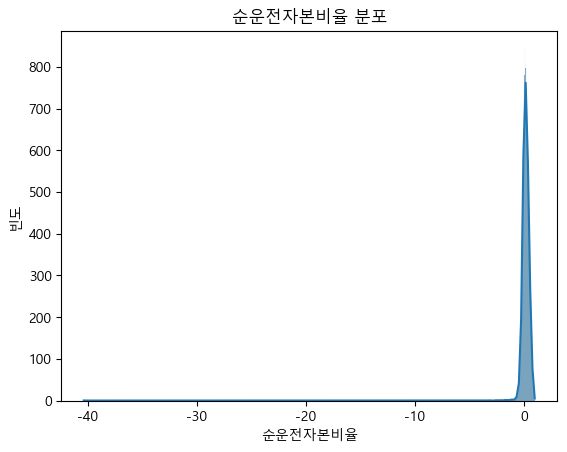

In [5]:
# 주요 수치형 변수 히스토그램 시각화
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0', 'stock_code', 'year', 'is_defaulted'])
selected_cols = numeric_cols.columns[:6]
for col in selected_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.show()

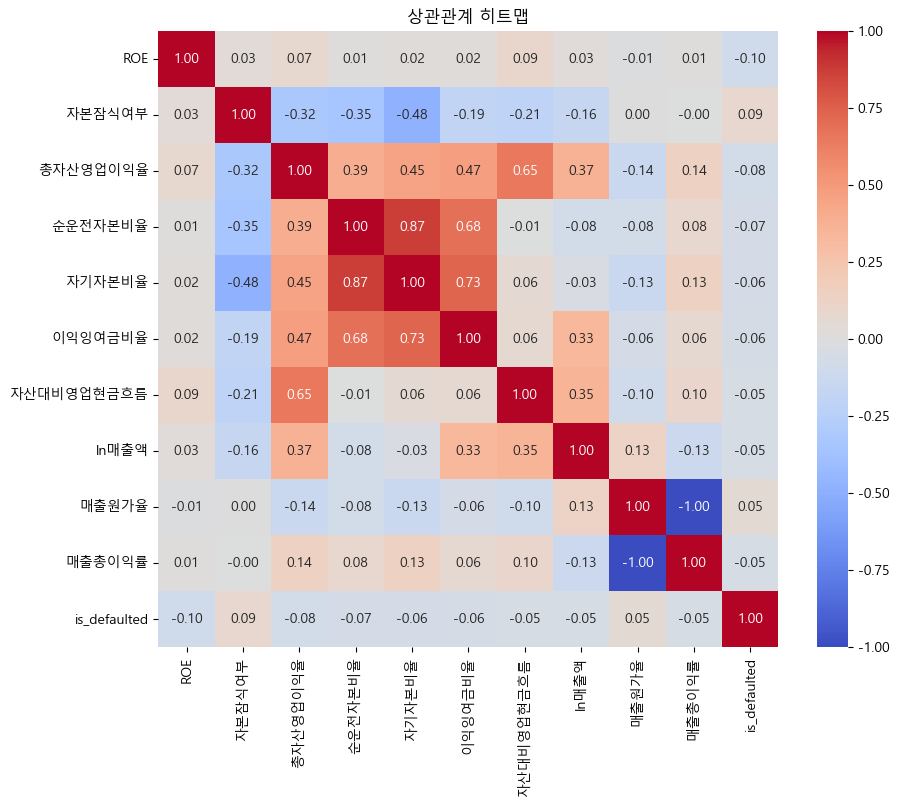

In [6]:
# 상관관계 분석
corr_matrix = df[numeric_cols.columns.tolist() + ['is_defaulted']].corr()
target_corr = corr_matrix['is_defaulted'].drop('is_defaulted').sort_values(ascending=False)

# 히트맵
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
top_corr_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()
sns.heatmap(df[top_corr_features + ['is_defaulted']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()